In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import umap
import json
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pickle
import re

sns.set()

In [3]:
DATA_PATH = "./data/recipes_raw_nosource_fn.json"

In [28]:
data = pd.read_json(DATA_PATH)
data = data.drop(['picture_link', 'title'])
data = data.dropna(axis=1)

In [5]:
data

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
ingredients,"[1/2 cup celery, finely chopped, 1 small green...","[2 pounds skirt steak, cut into 1/2-inch dice,...","[1 1/2 cups dried black beans, picked over and...","[1 1/4 pounds ground chuck, One 15-ounce can t...","[1 cup rice, brown, medium-grain, cooked, 1/2-...","[1 tablespoon extra-virgin olive oil, 2 baby I...",[1/2 teaspoon lightly crumbled saffron threads...,[4 top--sliced hot-dog buns (or fashion your o...,"[6 green or red bell peppers, 1/2 cup olive oi...","[1 medium head cauliflower (about 2 pounds), c...",...,"[Ice, 1 slice jalapeno, seeded 1 by 1/4-inch p...","[1/4 cup butter, 1/3 cup sugar, 1 teaspoon gro...","[2 cups coconut milk, 1 short stalk lemon gras...","[2 large heads garlic, 1 cut-up chicken, about...","[1 sheet frozen puff pastry, thawed, 1 egg, 1 ...","[4 ears fresh corn, 2 heads Belgian endive, 2 ...","[4 large plum tomatoes, Salt and sugar, 1 1/2 ...","[3 tablespoons olive oil, 2 tablespoons unsalt...","[8 ounces butter, 8 ounces bittersweet chocola...",[3 (10.5-ounce) cans restaurant-style condense...
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...


In [ ]:
# i = 0
# for ind, row in data.iterrows():
#     new_ingredients = []
#     for ingredient in data.loc[ind, "ingredients"]:
#         ingredient = ingredient.replace(",", "")
#         ingredient = ingredient.replace(".", "")
#         ingredient = ingredient.replace(";", "")
#         ingredient = ingredient.replace("\"", "")
#         new_ingredients.append(ingredient)
#     if i < 5:
#         print(data.loc[ind, "ingredients"])
#         i+=1
#     else:
#         break
#     print(data.loc[ind, "ingredients"])
#     data.loc[ind, "ingredients"] = new_ingredients

In [29]:
punctuation = r"""!"#$%&*+,-.:;<=>?@[\]^_`{|}~"""
punc_re = re.compile("[%s]" % punctuation)
for ind, item in data.iteritems():
    new_ingredients = []
    if type(item['ingredients']) == np.float64:
        data = data.drop(ind, axis=1)
        print(item['ingredients'])
    else:
        for ingredient in item['ingredients']:
            new_ingredient = punc_re.sub("", ingredient)
            new_ingredient = new_ingredient.lower()
            new_ingredients += [new_ingredient]
        data.at["ingredients", ind] = new_ingredients

In [30]:
data

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
ingredients,"[1/2 cup celery finely chopped, 1 small green ...","[2 pounds skirt steak cut into 1/2inch dice, k...",[1 1/2 cups dried black beans picked over and ...,"[1 1/4 pounds ground chuck, one 15ounce can to...","[1 cup rice brown mediumgrain cooked, 1/2cup q...","[1 tablespoon extravirgin olive oil, 2 baby it...",[1/2 teaspoon lightly crumbled saffron threads...,[4 topsliced hotdog buns (or fashion your own ...,"[6 green or red bell peppers, 1/2 cup olive oi...",[1 medium head cauliflower (about 2 pounds) cu...,...,"[ice, 1 slice jalapeno seeded 1 by 1/4inch pie...","[1/4 cup butter, 1/3 cup sugar, 1 teaspoon gro...","[2 cups coconut milk, 1 short stalk lemon gras...","[2 large heads garlic, 1 cutup chicken about 3...","[1 sheet frozen puff pastry thawed, 1 egg, 1 t...","[4 ears fresh corn, 2 heads belgian endive, 2 ...","[4 large plum tomatoes, salt and sugar, 1 1/2 ...","[3 tablespoons olive oil, 2 tablespoons unsalt...","[8 ounces butter, 8 ounces bittersweet chocola...",[3 (105ounce) cans restaurantstyle condensed c...
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...


In [31]:
dict_of_words = {}

for ingredients in data.loc['ingredients',:]:
    for ingredient in ingredients:
        for word in ingredient.split():
            word = word.rstrip(",.")
            if not word in dict_of_words.keys():
                dict_of_words[word] = 1
            else:
                dict_of_words[word] += 1

In [32]:
df_words = pd.DataFrame.from_dict(dict_of_words, "index", columns=["count"])
df_words = df_words.sort_values('count', ascending=False)

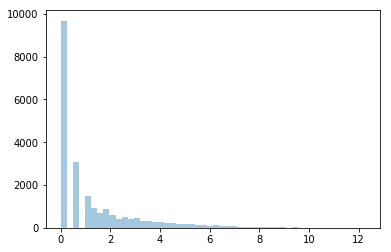

In [33]:
sns.distplot(np.log(df_words.values), kde=False)

In [34]:
top_words = (df_words[10:2010].index.values)
top_words

array(['pepper', 'cups', '3', ..., 'meat)', 'tapenade', 'spreading'],
      dtype=object)

In [35]:
zero_data = np.zeros(shape=(len(data.T), len(list(top_words))))
final_data = pd.DataFrame(zero_data, columns=list(top_words))

In [36]:
top_words_set = set(top_words)
i = 0
for ingredients in data.loc['ingredients',:]:
    bigset = set()
    for ingredient in ingredients:
        bigset.update(ingredient.split())
    for ingredient in top_words_set.intersection(bigset):
        final_data.loc[i,ingredient] = 1
    if (i % 1000 == 0):
        print(bigset)
    i += 1

{'small', 'butter', 'pound', 'cream', 'dash', 'crabmeat', '1/4', 'cups', 'sauce', 'pepper', 'crumbs', 'teaspoons', 'green', 'finely', 'crushed', 'chopped', 'coarsely', 'onions', 'salt', 'hot', '3/4', 'heavy', 'teaspoon', 'celery', 'sliced', 'cracker', 'dry', 'melted', 'cup', '1/2', 'parsley', '1', 'mustard'}
{'tablespoon', 'carrots', 'and', 'rotelle', 'cream', 'garlic', 'olive', 'liquid', 'minced', 'including', '2', '1/4', 'grated', 'cups', 'each', 'yellow', 'freshly', 'pepper', 'ounces', 'reserve', 'pois', 'plum', 'tomatoes', 'taste', 'to', 'cloves', 'tablespoons', 'broccoli', 'chicken', 'juices', '8', 'salt', 'petits', '3/4', 'heavy', 'oil', 'pasta', 'stock', 'squash', 'or', 'florets', 'thinly', 'fresh', 'seeded', 'sliced', 'parmesan', 'cup', '1/2', 'diced', 'cooking', 'parsley', '1', 'frozen', 'cheese', 'basil', 'penne'}
{'half', 'mint', '3', 'and', 'wine', 'kosher', 'vegetable', 'olive', 'frying', 'serving', 'tahini', '1/4', '2', 'grated', 'cups', 'dried', 'for', 'teaspoons', 'ounc

In [37]:
pca = sklearn.decomposition.PCA(n_components=2)
pcaed = pca.fit_transform(final_data)

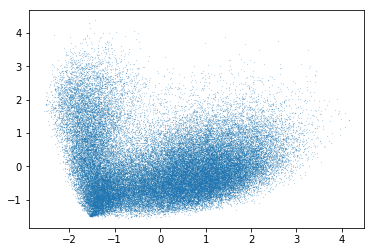

In [38]:
plt.scatter(pcaed[:, 0], pcaed[:, 1], s=0.01)

In [ ]:
embedding = umap.UMAP(n_neighbors=100,
                      min_dist=0.3,
                      metric='correlation').fit_transform(final_data)

In [ ]:
pickle.dump(final_data, open( "final_data.p", "wb" ))
pickle.dump(embedding, open( "embedding.p", "wb" ))